# multi - class Logistic Regression


## About Dataset
Here we will take red wine data and given different chemical tests, we want to predict the quality of wine

## Loading Libraries

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Data
We will use 'read_csv()' function for loading the data.

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

## Understanding Data
Let's see how our data looks.

In [3]:
# Red Wine
red_wine_data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:

red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Different attributes
**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9.  pH
10.  sulphates
11.  alcohol
12. quality (score between 0 and 10)

In [5]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's see target variable 'quality'.

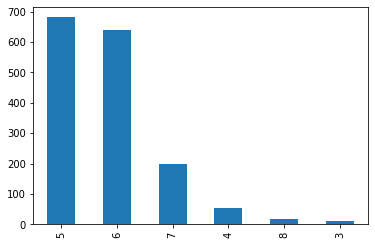

In [6]:
red_wine_data.quality.value_counts().plot(kind = 'bar')
plt.show()

We can observe here more wines are of average quality than poor quality and good quality.

### Separating Input Features and Output Features

In [7]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1)   # her we are droping the quality feature as this is the target and 'X' is input features

y = red_wine_data.quality             # Output/Dependent variable

In [8]:
# Let's check the shapes of X and y
print("Shape: ", X.shape)
print("Shape: ", y.shape)

Shape:  (1599, 11)
Shape:  (1599,)


input variable must be a 2D array and target of 1D array.

### Splitting the data into Train and Test Set

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.20: 20% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Building Model

In [11]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [12]:
log_model = LogisticRegression()

In [13]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression()

The training happens in the third line (the "fit" function).

**Point to be noted:**
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

If you clearly observe the above output that you got after fitting the model, there is an argument called 'multi_class' which is 'auto' by default. Here 'auto' does automatic selection of binary and multinomial. If the data is binary classification 'auto' does binary classification, and if the data is multi classification, 'auto' does multi classification. 

Note: You can also change 'auto' to 'ovr'. Here 'ovr' does only binary classificaion.

Further details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
LogisticRegression?

### Prediction
Now logistic regression model (i.e. log_model) is trained using X_train and y_trian data. Let's predict the target value (i.e. the quality of wine) for the X_test data. We use "predict()" method for prediction.

In [15]:
predictions = log_model.predict(X_test)

We already have actual target values (i.e. y_test) for X_test. Let's compare y_test and the predicted value for X_test by our log_model.

In [16]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [17]:
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,

### Model Performance

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0, 94, 36,  0,  0],
       [ 0,  0, 47, 83,  2,  0],
       [ 0,  0,  4, 37,  1,  0],
       [ 0,  0,  0,  5,  0,  0]])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, predictions)

0.55625

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.72      0.66       130
           6       0.51      0.63      0.56       132
           7       0.33      0.02      0.04        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.24      0.23      0.21       320
weighted avg       0.50      0.56      0.51       320



#### Applying RFE

In [23]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= log_model , step = 1) 
# estimator log_model is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False  True False False False False False  True  True  True  True]
Feature Ranking: [4 1 2 5 3 6 7 1 1 1 1]


In [24]:
# Representing feature ranks in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
1,volatile acidity,1
7,density,1
8,pH,1
9,sulphates,1
10,alcohol,1
2,citric acid,2
4,chlorides,3
0,fixed acidity,4
3,residual sugar,5
5,free sulfur dioxide,6


#### Create a new subset of the data with only the selected features
Now that we have obtained which features have the best score, we'll select only those features to fit the model.

To select important features you need to apply transformation on the dataset. We use .transform() to transform our dataset with important selected features. Always remember that train and test data must be transformed separately, else there might be data leak that hampers the model training.

In [25]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = log_model.fit(X_train_rfe, y_train)

In [26]:
from sklearn.metrics import accuracy_score, f1_score

In [27]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
print("RFE Model Accuracy:", rfe_ac)

RFE Model Accuracy: 0.55625


In [28]:
print(classification_report(y_test, y_pred_rfe))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.80      0.68       130
           6       0.54      0.52      0.53       132
           7       0.35      0.14      0.20        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.51      0.56      0.52       320



## Exercise
Use raw data link of iris data: https://archive.ics.uci.edu/ml/datasets/iris

**Exercises**
* Train Logistic Regression Model for this dataset
* Predict the output for test data
* Find out the accuracy of the model you built.